In [1]:
import numpy as np
from collections import Counter

In [2]:
def train_test_split(X, y, test_size = 0.2, random_state = 42):
  np.random.seed(random_state)
  n_samples = len(X)
  indices = np.random.permutation(n_samples)
  test_count = int(n_samples * test_size)
  test_indices = indices[:test_count]
  train_indices = indices[test_count:]

  X_train = X[train_indices]
  y_train = y[train_indices]

  X_test = X[test_indices]
  y_test = y[test_indices]

  return X_train, X_test, y_train, y_test

In [3]:
def accuracy(y_true, y_pred):

    correct = np.sum(y_true == y_pred)

    return correct / len(y_true)

In [4]:
class KNN:
  def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def _distances(self, x1, x2):
    return np.linalg.norm(x1-x2)

  def _predict_one(self, x):
    distances = []
    for i in range  (len(self.X_train)):
      d = self._distances(x, self.X_train[i])
      distances.append((d, self.y_train[i]))

    distances.sort(key = lambda item: item[0])
    neighbours = distances[:self.k]

    labels = []
    for _, label in neighbours:
      labels.append(label)

    most_common = Counter(labels).most_common(1)
    return most_common[0][0]

  def predict(self, X):
    predictions = []
    for x in X:
      pred = self._predict_one(x)
      predictions.append(pred)

    return np.array(predictions)

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    random_state = 42
)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
model = KNN(k=5)
model.fit(X_train, y_train)

In [8]:
predictions = model.predict(X_test)

In [9]:
acc = accuracy(y_test, predictions)
print("Accuracy: ", acc)

Accuracy:  0.97


In [10]:
new_points = np.array([
    [2,2],
    [-2,-1],
    [0,1]
])

new_predictions = model.predict(new_points)
print("New Predictions: ", new_predictions)

New Predictions:  [1 1 0]


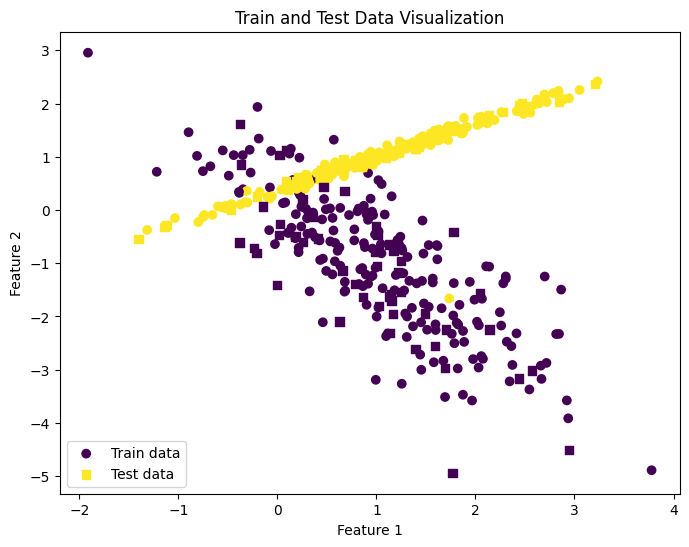

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train,
    marker='o',
    label='Train data'
)

plt.scatter(
    X_test[:,0],
    X_test[:,1],
    c=y_test,
    marker='s',
    label='Test data'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Train and Test Data Visualization")
plt.legend()

plt.show()


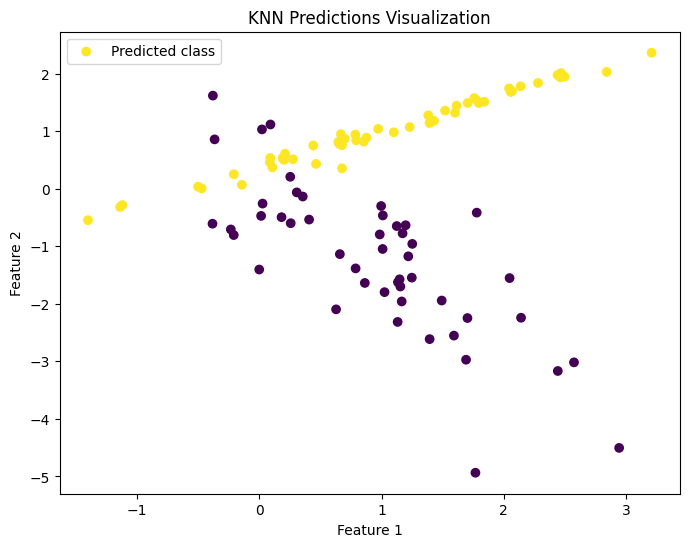

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_test[:,0],
    X_test[:,1],
    c=predictions,
    marker='o',
    label='Predicted class'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Predictions Visualization")
plt.legend()

plt.show()


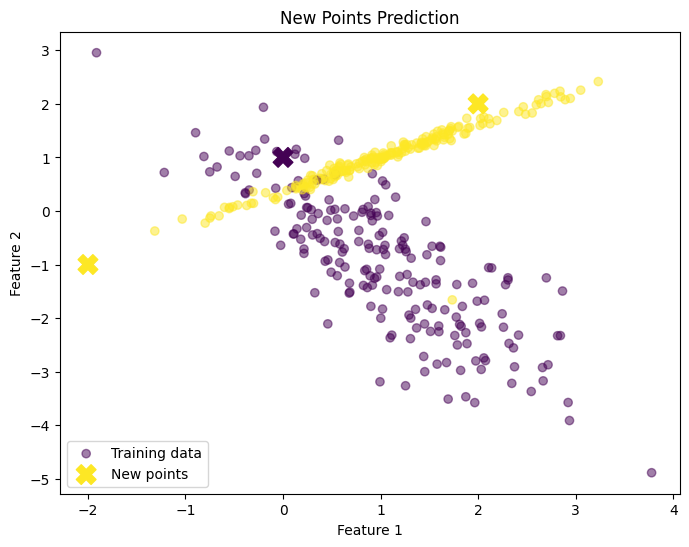

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train,
    marker='o',
    alpha=0.5,
    label='Training data'
)

plt.scatter(
    new_points[:,0],
    new_points[:,1],
    c=new_predictions,
    marker='X',
    s=200,
    label='New points'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("New Points Prediction")
plt.legend()

plt.show()


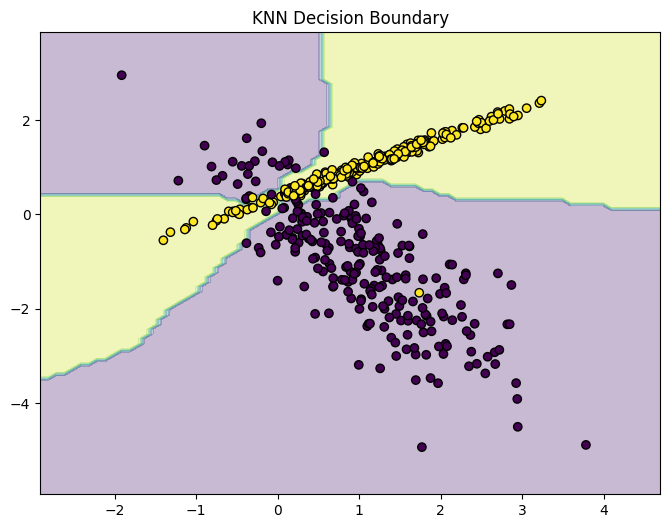

In [14]:
h = 0.1

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(grid)

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    edgecolor='k'
)

plt.title("KNN Decision Boundary")

plt.show()
